##Music Classifer using SVM

## Dataset

This is a dataset of Spotify tracks over a range of 125 different genres. Each track has some audio features associated with it. The data is in CSV format which is tabular and can be loaded quickly.

## Installation

Use the following pip command to download proper libraries to run this code.

```
pip install scikit-learn pandas numpy matplotlib 
```

## Usage

To use this classifier, you need to follow these steps:

1. Download dataset from this [link](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

2. Run this notebook

3. The notebook will load the dataset, preprocess it, train the SVM classifier, and evaluate its performance using cross-validation and a confusion matrix. It will also show the five features with the largest weight on the classification.

4. You can modify the parameters of the SVM classifier, such as the kernel or the regularization parameter, to see if you can improve its performance.

## Results

I ran into an issue with lower accuracy than expected. However it still pulled the weights I was expecting from pervious findings



In [13]:
# Scikit-Learn installation
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [14]:
# All the imports
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
# Load the file. 
df = pd.read_csv('dataset.csv')

In [16]:
df_modif = df.copy()

In [17]:
# SVM classification requires numerical data, so we remove the non-numeric columns from the dataframe (except for the genre label).
non_floats = []
for col in df_modif.iloc[:,:-1]:
    if df_modif[col].dtypes != "float64":
        non_floats.append(col)
df_modif = df_modif.drop(columns=non_floats)

In [19]:
# We use a MinMaxScaler to normalize the features between 0 and 1.
L = len(df_modif.columns)

min_max_scaler = preprocessing.MinMaxScaler()
df_modif.iloc[:,:L-1] = min_max_scaler.fit_transform(df_modif.iloc[:,:L-1].values)

In [20]:
# Select all columns except 'track_genre' for features
X = df_modif.drop('track_genre', axis=1).values

# Genre tags are converted to categorical data
df_modif.track_genre = pd.Categorical(df_modif.track_genre)

# Each genre is encoded as a numerical code
y = np.array(df_modif.track_genre.cat.codes)


In [21]:
# The data is split between a test set and a train set. In this case I'm using a 80/20 distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 13)

# Check sizes of input and output vectors
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (108300, 9) , Size of train output vector:  (108300,)
Size of test features matrix:  (5700, 9) , Size of test output vector:  (5700,)


In [22]:
# Create an SVM object with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the model to the training data (X_train contains the features and y_train contains the genre labels)
clf.fit(X_train, y_train)

# Use the trained model to predict the genre labels of the test data
y_pred = clf.predict(X_test)

In [23]:
# Use 5-fold cross-validation to compute the accuracy of the model
accuracy = cross_val_score(clf, X, y, cv=10)
mean_accuracy = accuracy.mean()

print("Accuracy: ", mean_accuracy)

Accuracy:  0.14597368421052634


<Axes: >

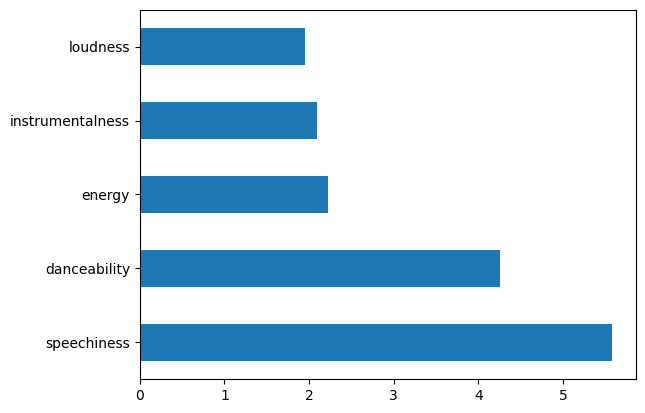

In [24]:
# Find the 5 features with the largest weight on the classification
pd.Series(abs(clf.coef_[0]), index=df_modif.iloc[:,:L-1].columns).nlargest(5).plot(kind='barh')